In [40]:
!wget -nc "https://www.gutenberg.org/cache/epub/1597/pg1597.txt"

File ‘pg1597.txt’ already there; not retrieving.



In [41]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
class Sentences(object):
    def __init__(self):
        self.sentence_count = 0
        self.epoch = 0

    def __iter__(self):
        print(f"Epoch {self.epoch}")
        self.epoch += 1

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        for fname in files:
            with open(fname) as f_input:
                corpus = f_input.read()
            raw_sentences = sent_tokenize(corpus)
            for sentence in raw_sentences:
                if len(sentence) > 0:
                    self.sentence_count += 1
                    yield simple_preprocess(sentence)


sentences = Sentences()

model = Word2Vec(
    sg=1,
    size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

model.build_vocab(sentences)

model.train(sentences=sentences, total_examples=model.corpus_count, epochs=1)

print("Done.")

Epoch 0
Epoch 1
Done.


In [43]:
#corpus

In [44]:
# word2vec take the word and predict the context around it

# size = size of the vocabulary vector
# window = 
# sg1= 

In [45]:
#model.wv.most_similar("chocolate", topn=20)

In [46]:
model.wv.vocab


{'harry': <gensim.models.keyedvectors.Vocab at 0x7f6b20193d90>,
 'potter': <gensim.models.keyedvectors.Vocab at 0x7f6b20193690>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a990>,
 'worst': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a0d0>,
 'birthday': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a2d0>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7f6b2130ad90>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a4d0>,
 'first': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a890>,
 'time': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a250>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a290>,
 'argument': <gensim.models.keyedvectors.Vocab at 0x7f6b2130ad10>,
 'had': <gensim.models.keyedvectors.Vocab at 0x7f6b2130ab50>,
 'broken': <gensim.models.keyedvectors.Vocab at 0x7f6b2130aad0>,
 'out': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a110>,
 'over': <gensim.models.keyedvectors.Vocab at 0x7f6b2130a1d0>,
 'breakfast': <gensim.models.keyedvectors.Vocab

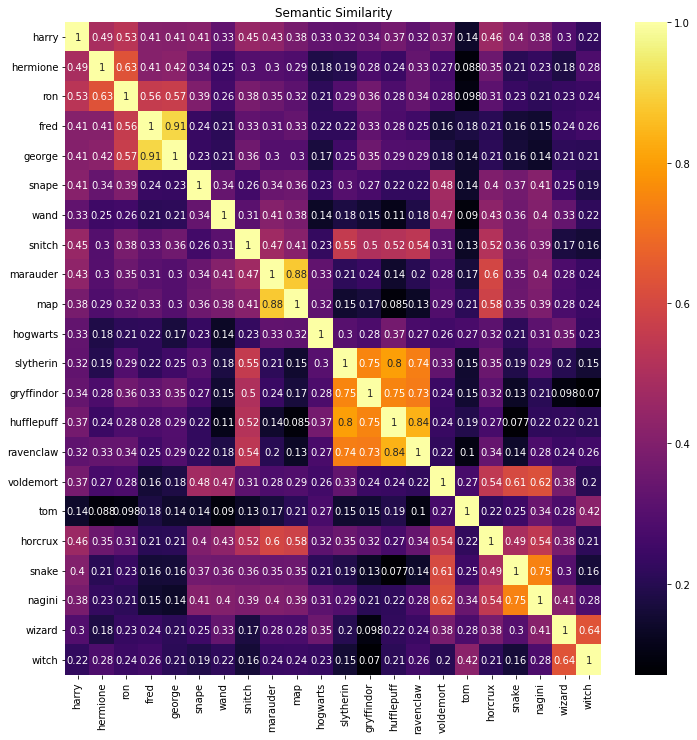

In [26]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")
            
words = [
    "harry",
    "hermione",
    "ron",
    "fred",
    "george",
    "snape",
    "wand",
    "snitch",
    "marauder",
    "map",
    "hogwarts",
    "slytherin",
    "gryffindor",
    "hufflepuff",
    "ravenclaw",
    "voldemort",
    "tom",
    "horcrux",
    "snake",
    "nagini",
    "wizard",
    "witch"
]
plot_similarities(words)